In [1]:
import warnings
import pandas as pd 
import numpy as np
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')
from Scripts.Data_cleaning import load_data,clean_data
from Scripts.data_visualization import Data_visualiz

###### Load datasets

In [2]:
train = load_data('../data/train-data.csv')
test = load_data('../data/test-data.csv')

In [6]:
train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,555.0,1,1,0,1,31,7,2015,212,31
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,546.0,1,1,0,1,30,7,2015,211,31
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,523.0,1,1,0,1,29,7,2015,210,31
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,560.0,1,1,0,1,28,7,2015,209,31
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,612.0,1,1,0,1,27,7,2015,208,31


In [7]:
test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Open,Promo,StateHoliday,SchoolHoliday,Days,months,Years,DayOfYear,WeekOfYear
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-17,1.0,1.0,0,0.0,17.0,9.0,2015.0,260.0,38.0
1,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-16,1.0,1.0,0,0.0,16.0,9.0,2015.0,259.0,38.0
2,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-15,1.0,1.0,0,0.0,15.0,9.0,2015.0,258.0,38.0
3,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-14,1.0,1.0,0,0.0,14.0,9.0,2015.0,257.0,38.0
4,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",...,2015-09-13,0.0,0.0,0,0.0,13.0,9.0,2015.0,256.0,37.0


In [3]:
D = Data_visualiz()

##### Graphical analysis

###### distribution for train 

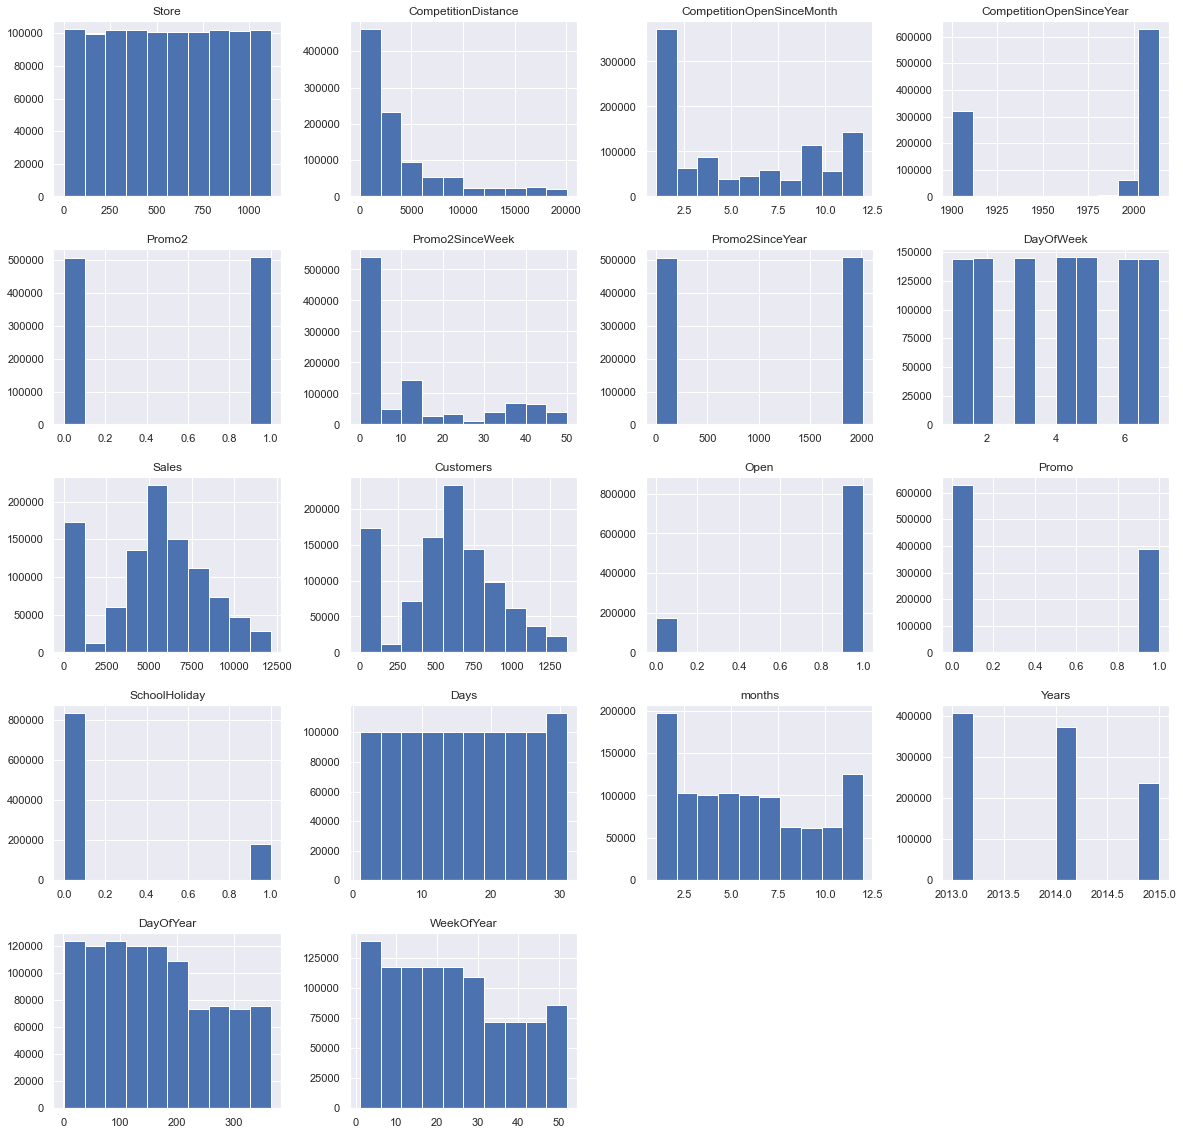

In [4]:
D.histogram(train)

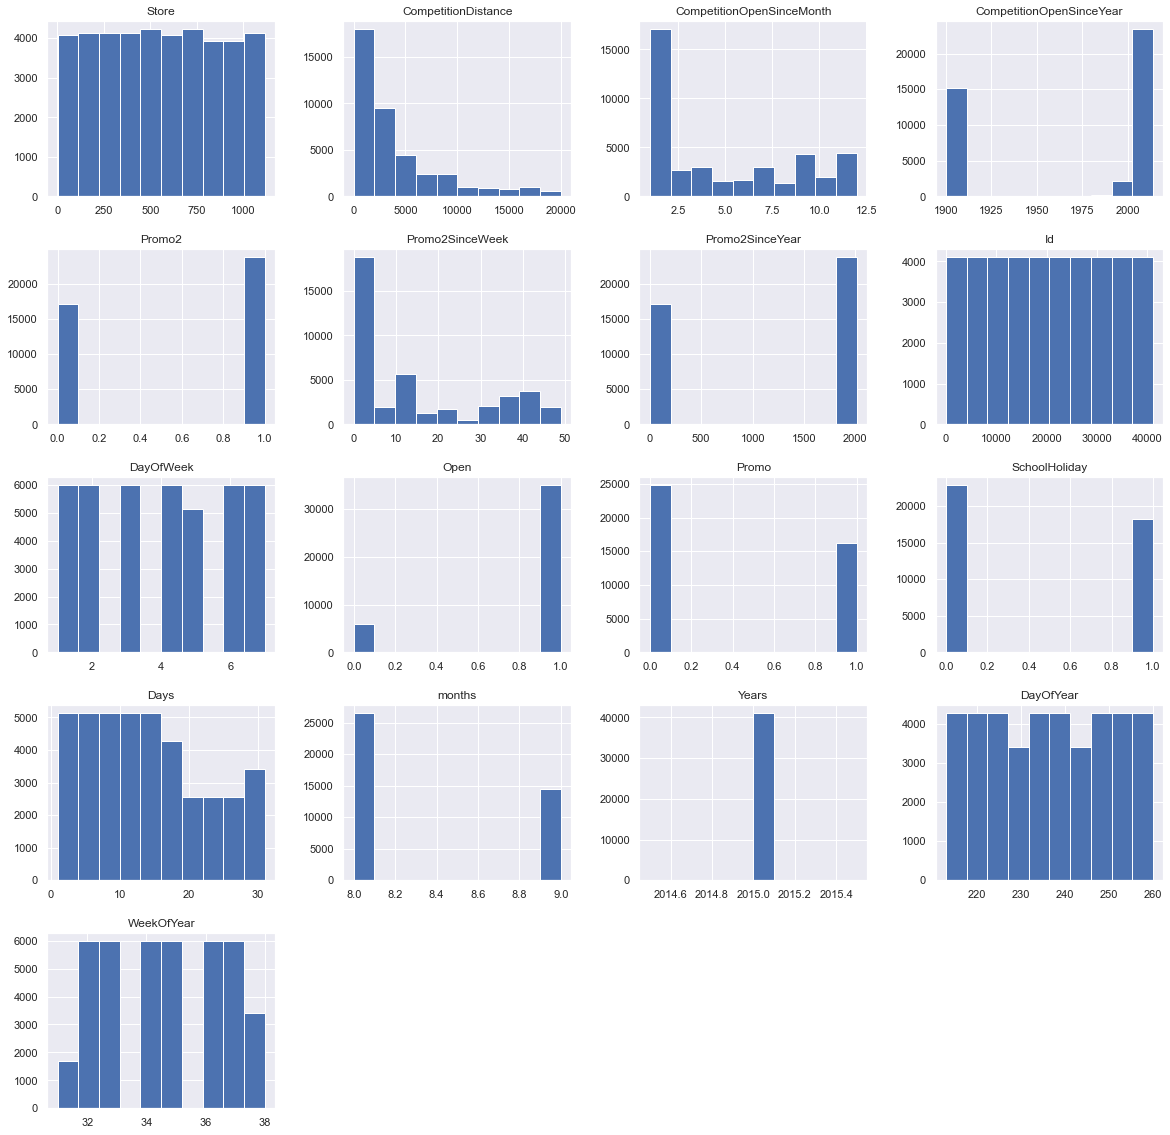

In [5]:
D.histogram(test)